## Loading libraries

- Make sure to load the API key in the environment

In [5]:
from autogen.code_utils import create_virtual_env
from autogen.coding import LocalCommandLineCodeExecutor
from autogen import ConversableAgent, AssistantAgent
import os

# Setup virtual environment for code execution
venv_dir = ".venvautogen"
venv_context = create_virtual_env(venv_dir)

In [6]:
# Configuration for the CodeExecutorAgent
executor = LocalCommandLineCodeExecutor(
    timeout=120,  # Increased timeout for potentially long-running data tasks
    work_dir="energy_data_analysis",  # Dedicated directory for energy data tasks
    virtual_env_context=venv_context,
)

# Define the model for CodingAssistantAgent
llm_config = {"model": "gpt-4o-mini"}

# Setup CodingAssistantAgent
code_writer_agent = AssistantAgent(
    name="code_writer_agent",
    llm_config=llm_config,
    code_execution_config=False,  # This agent does not execute code directly
    human_input_mode="NEVER",  # Automated, does not require human interaction
)

# Setup CodeExecutorAgent
code_executor_agent = ConversableAgent(
    name="code_executor_agent",
    llm_config=False,  # This agent does not use an LLM for generating responses
    code_execution_config={"executor": executor},
    human_input_mode="ALWAYS",
    default_auto_reply="Please continue. If everything is done, reply 'TERMINATE'.",
)

In [7]:
# Example usage of the agent system to handle a task
def handle_task(prompt):
    code_writer_agent_system_message = code_writer_agent.system_message
    # Code generation by the CodingAssistantAgent
    
    # Code execution by the CodeExecutorAgent
    chat_result = code_executor_agent.initiate_chat(
        code_writer_agent,
        message=prompt,
    )
    
    return chat_result

In [8]:
# Define tasks
tasks = {
    "Data Engineer":"Responsibilities: Generate code to collect data from any source, if not found make sample data, clean, and prepare Chicago Energy data for 2020-2024 in a csv file name chicago_energy_data.csv.",
    "Data Analyst": "Responsibilities: Generate code to visualize Chicago Energy usage for 2020-2024 using the chicago_energy_data.csv file which is in the same folder and plot it and save it as chicago_energy_consumption.png file.",
    "Data Scientist": "Responsibilities: Generate code to forecast Chicago Energy usage for 2025-2027 can take reference from the chicago_energy_data.csv file which has data from 2020-2024 and plot it and save it as chicago_energy_forecast.png file."
}

# Execute tasks
for task_name, task_prompt in tasks.items():
    print(f"Handling task: {task_name}")
    result = handle_task(task_prompt)
    print(f"Result for {task_name}: {result}")

Handling task: Data Engineer
code_executor_agent (to code_writer_agent):

Responsibilities: Generate code to collect data from any source, if not found make sample data, clean, and prepare Chicago Energy data for 2020-2024 in a csv file name chicago_energy_data.csv.

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

To prepare the Chicago Energy data for the years 2020-2024, I will follow these steps:

1. **Generate Sample Data**: Since I do not have access to actual Chicago Energy data, I will create sample data for the years 2020 to 2024. The data will include fields such as 'Year', 'Month', 'Energy_Consumption', and 'Energy_Cost'.
   
2. **Data Cleaning and Preparation**: After generating the sample data, I will ensure that the data is structured properly and that there are no missing values.

3. **Export to CSV**: Finally, I will save this cleaned data into a CSV file named `chicago_energy_data.csv`.

Here 

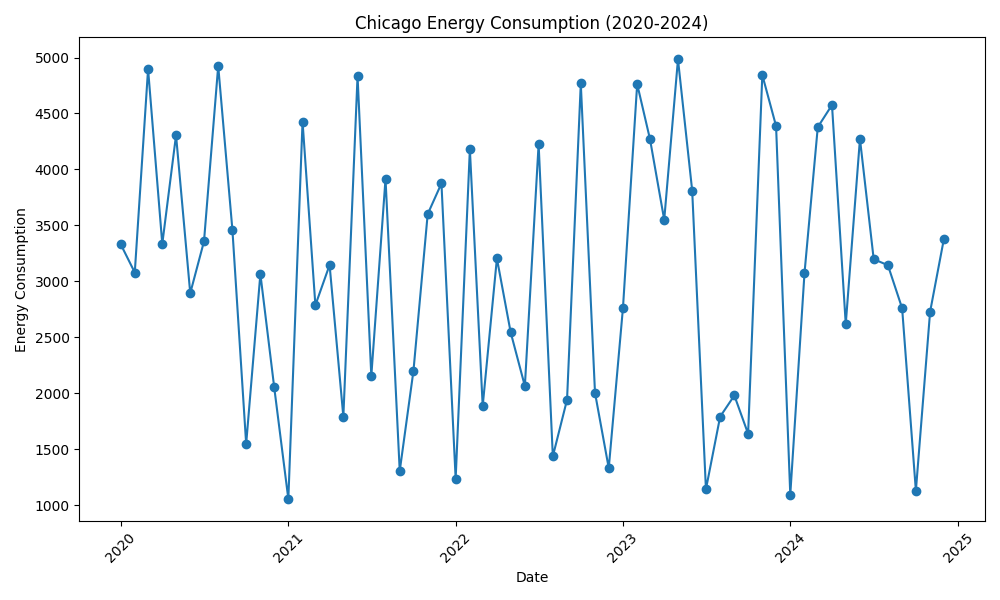

In [9]:
import os
from IPython.display import Image

Image(os.path.join("energy_data_analysis", "chicago_energy_consumption.png"))

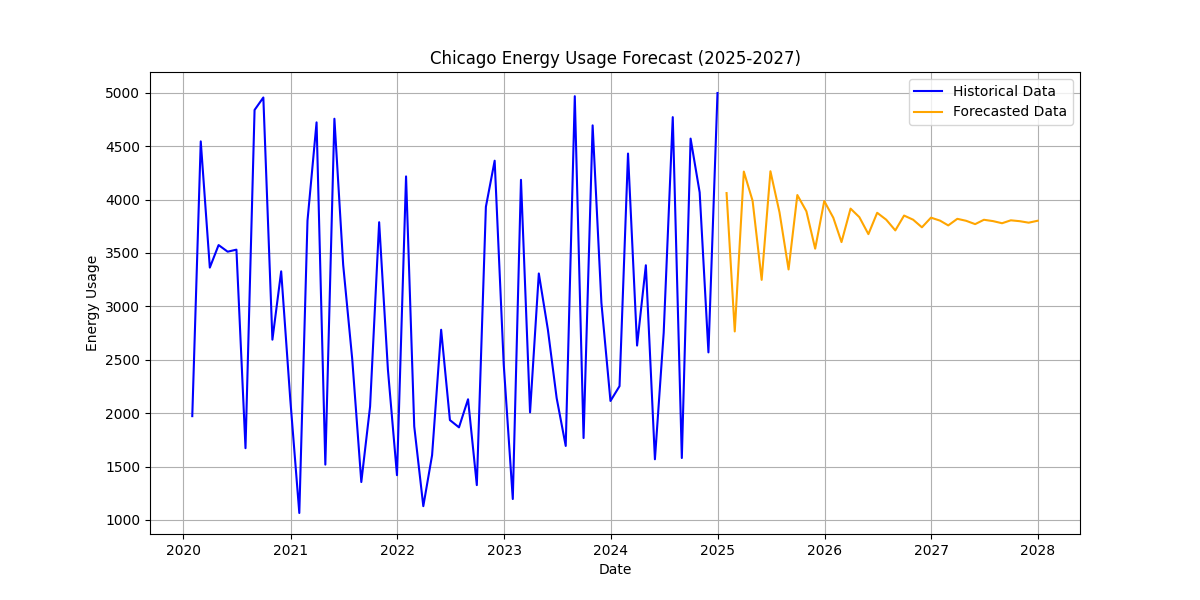

In [10]:
Image(os.path.join("energy_data_analysis", "chicago_energy_forecast.png"))